In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
dots = sns.load_dataset("dots")
fmri = sns.load_dataset("fmri")
flights = sns.load_dataset("flights")
dowjones = sns.load_dataset("dowjones")
anagrams = sns.load_dataset("anagrams")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp")
healthexp = sns.load_dataset("healthexp").sort_values("Year")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")

# Visualizing categorical data

- relational 플롯 튜토리얼에서는 데이터 집합의 여러 변수 간의 관계를 나타내는 다른 시각적 표현 방법을 사용하는 방법을 살펴 보았습니다. 
- 예제에서는 주로 두 개의 수치 변수 간의 주요 관계에 초점을 맞추었습니다. 
- 그러나 주요 변수 중 하나가 "범주형" (이산 그룹으로 분할 된)인 경우 시각화를 위해 더 특화된 접근 방법을 사용하는 것이 도움이 될 수 있습니다.

- Seaborn에서 범주형 데이터를 포함한 관계를 시각화하는 다양한 방법이 있습니다. 
- relplot()과 scatterplot() 또는 lineplot()의 관계와 유사하게, 이러한 플롯을 만드는 두 가지 방법이 있습니다. 
- 다양한 방법으로 범주형 데이터를 시각화하는 축 수준 함수와 이러한 함수에 통합된 고수준 인터페이스인 catplot()이 있습니다.

- 다른 카테고리 플롯 종류를 세 가지 그룹으로 생각하는 것이 도움이 됩니다. 
- 이에 대해 자세히 설명하겠습니다. 이들은 다음과 같습니다.

- Categorical scatterplots:

    - stripplot() (with kind="strip"; the default)

    - swarmplot() (with kind="swarm")

- Categorical distribution plots:

    - boxplot() (with kind="box")

    - violinplot() (with kind="violin")

    - boxenplot() (with kind="boxen")

- Categorical estimate plots:

    - pointplot() (with kind="point")

    - barplot() (with kind="bar")

    - countplot() (with kind="count")

- 이러한 그룹들은 데이터를 서로 다른 세부 수준으로 나타냅니다. 
- 사용할 플롯을 결정할 때, 답변하려는 질문을 생각해야 합니다. 
- 통합 API를 사용하면 다양한 종류의 플롯에서 데이터를 쉽게 전환하고 여러 관점에서 데이터를 볼 수 있습니다.

- 이 튜토리얼에서는 주로 고수준 인터페이스인 catplot()에 초점을 맞춥니다. 
- 이 함수는 위의 각 함수의 고수준 인터페이스이므로 각 플롯별 더 상세한 API 문서를 참조하면서 각 종류의 플롯을 보여줄 때 이들을 참조할 것입니다.

# Categorical scatterplots

- catplot()의 기본 데이터 표시 방법은 산점도입니다. 
- seaborn에는 실제로 두 가지 다른 범주형 산점도가 있습니다. 
- 범주형 데이터를 산점도로 표시하는 주요 도전 과제는 하나의 범주형 변수 축에 속하는 모든 점이 동일한 위치에 놓이게 된다는 것입니다. 
- stripplot()이 사용하는 방식은 범주형 축의 점의 위치를 작은 양의 무작위 "jitter"로 조정하는 것입니다. 이것은 catplot()의 기본 "kind"입니다.

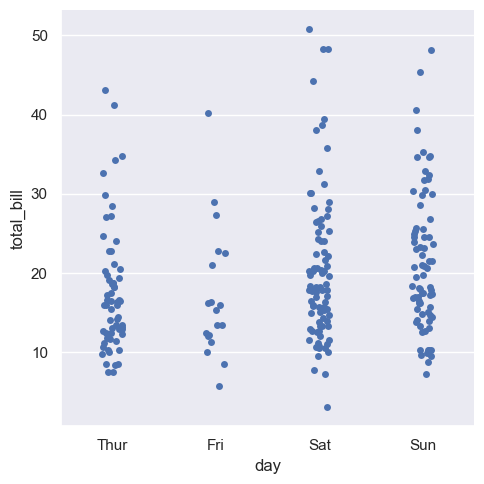

In [2]:
sns.catplot(data=tips, x="day", y="total_bill");

- jitter 매개 변수는 jitter의 크기를 제어하거나 완전히 사용하지 않도록 설정할 수 있습니다. 

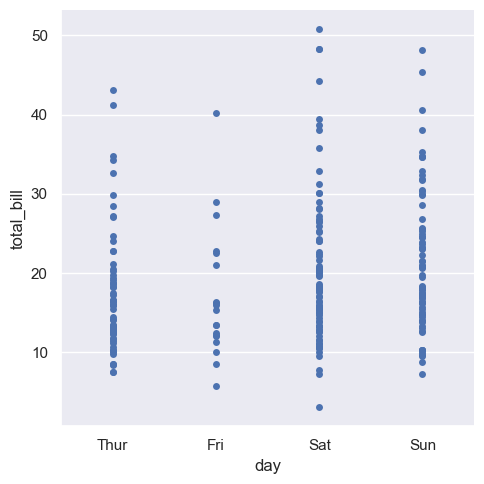

In [4]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False);

- 두 번째 방법은 범주 축을 따라 점을 중첩되지 않도록 조정하는 알고리즘을 사용합니다. 
- 이것은 관측치의 분포를 더 잘 나타내기 때문에 유용합니다. 하지만 비교적 작은 데이터셋에 대해서만 잘 작동합니다. 
- 이러한 종류의 그림은 "beeswarm"이라고도 하며, catplot()에서 kind="swarm"으로 설정하여 그릴 수 있습니다.

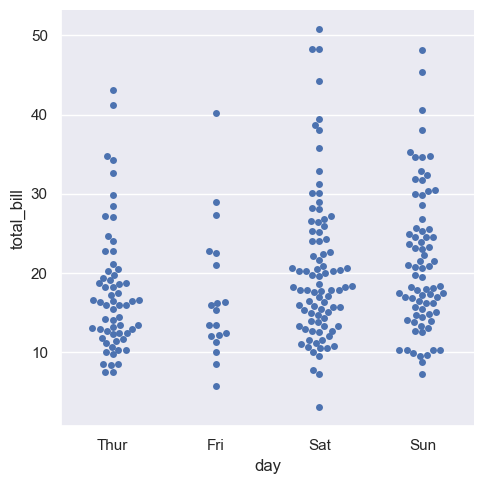

In [5]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm");

- 관계형 플롯과 유사하게 범주형 플롯에도 hue 시맨틱을 사용하여 다른 차원을 추가할 수 있습니다. 
- 그러나 범주형 플롯은 현재 크기 또는 스타일 시맨틱을 지원하지 않습니다. 산점도에 대해서는 점의 색상만 변경하면 됩니다.

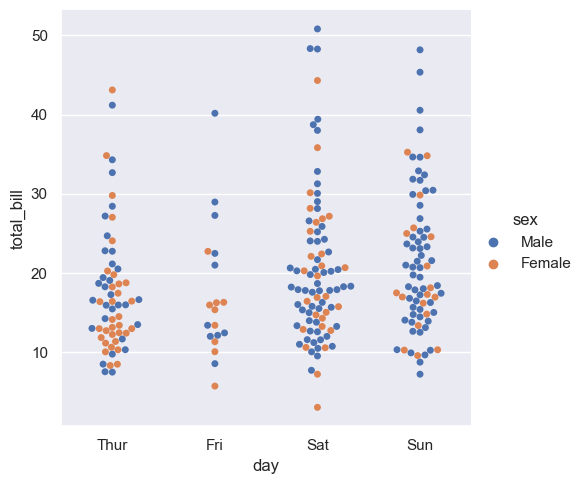

In [6]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm");

- 숫자 데이터와 마찬가지로 범주형 변수의 레벨을 축에 나열하는 방법이 항상 명확하지는 않습니다. 
- seaborn 범주형 플로팅 함수들은 일반적으로 데이터에서 범주의 순서를 추론하려고 합니다. 
- 데이터가 pandas Categorical 데이터 타입을 가지는 경우, 범주의 기본 순서는 거기에서 설정할 수 있습니다. 
- 범주 축에 전달된 변수가 숫자처럼 보이는 경우 레벨은 정렬됩니다. 
- 그러나 숫자가 레이블로 사용될 때에도 데이터는 범주형으로 처리되며 범주 축의 서수적 위치 (구체적으로 0, 1, ...)에서 그려집니다.

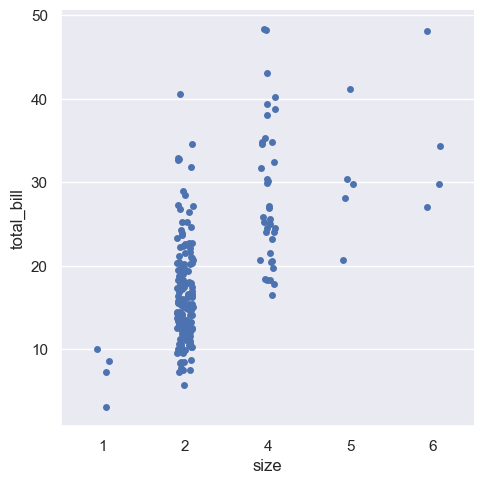

In [7]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill");

- 기본 순서를 선택하는 다른 옵션은 데이터 집합에 표시된 대로 카테고리의 수준을 사용하는 것입니다. 
- 순서 매개변수를 사용하여 플롯별로 순서를 제어할 수도 있습니다. 
- 이는 동일한 그림에 여러 범주형 플롯을 그릴 때 중요할 수 있으며, 이에 대한 자세한 내용은 아래에서 살펴보겠습니다:

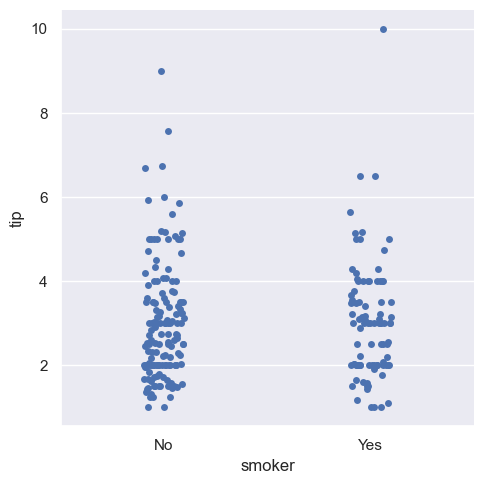

In [8]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"]);

- '범주형 축'이라는 개념을 언급했습니다. 이 예에서는 항상 가로 축에 해당합니다. 
- 그러나 범주형 변수를 세로축에 배치하는 것이 도움이 되는 경우가 많습니다(특히 범주 이름이 비교적 길거나 카테고리가 많은 경우). 
- 이렇게 하려면 변수를 축에 할당하는 방식을 바꾸면 됩니다:

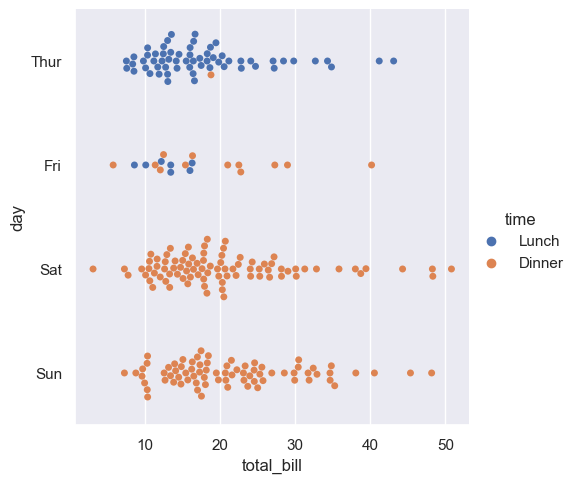

In [9]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm");